#WORDLE'O'MATIC 🤖
---



In [1]:
# Need this to get the other files
!git clone https://github.com/stj95/Wordleomatic.git
%cd Wordleomatic

Cloning into 'Wordleomatic'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 65 (delta 35), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 64.69 KiB | 2.49 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/Wordleomatic


In [ ]:
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime, date
import importlib

# Import the modules (not individual classes yet)
import wordle_users
import wordle_logs

# Reload the modules (this picks up file changes)
importlib.reload(wordle_users)
importlib.reload(wordle_logs)

# Now import the classes from the reloaded modules
from wordle_users import WordleUser
from wordle_logs import WordleLog

In [ ]:
# lines = []

# # Create the upload widget
# uploader = widgets.FileUpload(
#     accept='.txt',  # Only accept text files (optional)
#     multiple=False  # One file only
# )

# def on_upload_change(change):
#     global lines
#     if uploader.value:
#         uploaded_file = list(uploader.value.values())[0]
#         content_bytes = uploaded_file['content']
#         content_text = content_bytes.decode('utf-8')
#         lines = content_text.splitlines()
#         print("✅ File uploaded!")
#     else:
#         print("⚠️ No file uploaded.")

# # Display the widget
# uploader.observe(on_upload_change, names='value')
# display(uploader)

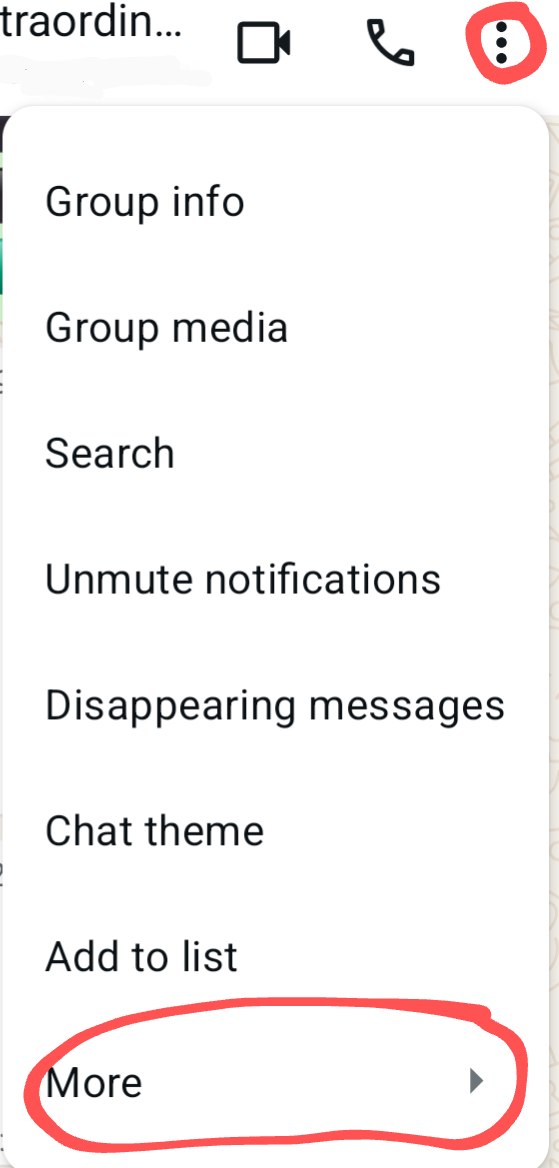

In [ ]:
# Create two DatePickers
start_date = widgets.DatePicker(
    description='Start:',
    value=date(2025, 4, 1),
    disabled=False
)

end_date = widgets.DatePicker(
    description='End:',
    value=date.today(),
    disabled=False
)

# Button to apply filter
apply_button = widgets.Button(description="Apply Date Filter")


# Display everything
print("Date range to calculate results:")
display(widgets.HBox([start_date, end_date]))


Date range to calculate results:


In [ ]:
output = widgets.Output()
lines = []
# Create the upload widget
uploader = widgets.FileUpload(
    accept='.txt',  # Only accept text files (optional)
    multiple=False  # One file only
)



def get_data(b):
    with output:
        output.clear_output()

        if not start_date.value or not end_date.value:
            print("⚠️ Please select both start and end dates.")
            return

        if not uploader.value:
          print("⚠️ Please upload a file before clicking 'Get scores'.")
          return

        # Handle both list and dict formats, just in case:
        uploaded_file = uploader.value[0] if isinstance(uploader.value, (list, tuple)) else list(uploader.value.values())[0]
        # uploaded_file = uploader.value[0]
        # uploaded_file = list(uploader.value.values())[0]

        content_bytes = uploaded_file['content']
        # content_text = content_bytes.decode('utf-8')
        content_text = bytes(content_bytes).decode('utf-8')
        lines = content_text.splitlines()
        print(" ")
        print(f"✅ Uploaded file with {len(lines)} lines")
        print(" ")
        log = WordleLog(start_date, end_date)
        log.parse_lines(lines)

        if not log.users:
            print("⚠️ No games found in the given date range.")
            return


        scoreboard = {}
        missed_games = {}
        missed_scores = {}
        tile_scores = {}
        average_scores = {}
        n_green_scores = {}
        n_yellow_scores = {}
        ones = {}
        sixs = {}
        losses = {}

        for name, user in log.users.items():
            user.get_stats()
            scoreboard[name] = user.total_score
            missed_games[name] = user.n_missed_games
            missed_scores[name] = user.missed_score
            tile_scores[name] = user.game_score
            average_scores[name] = user.average_score
            n_green_scores[name] = user.n_greens
            n_yellow_scores[name] = user.n_yellows
            ones[name] = user.ones
            sixs[name] = user.sixs
            losses[name] = user.losses

        sorted_scoreboard = dict(sorted(scoreboard.items(), key=lambda item: item[1]))
        sorted_missed_games = dict(sorted(missed_games.items(), key=lambda item: item[1]))
        sorted_missed_games_r = dict(sorted(missed_games.items(), key=lambda item: item[1], reverse=True))
        sorted_greens = dict(sorted(n_green_scores.items(), key=lambda item: item[1], reverse=True))
        sorted_yellows = dict(sorted(n_yellow_scores.items(), key=lambda item: item[1], reverse=True))
        sorted_ones = dict(sorted(ones.items(), key=lambda item: item[1], reverse=True))
        sorted_sixs = dict(sorted(sixs.items(), key=lambda item: item[1], reverse=True))
        sorted_losses = dict(sorted(losses.items(), key=lambda item: item[1], reverse=True))

        # ------------------------ SCOREBOARD ----------------------------

        print(" ")
        print("############ SCOREBOARD ############")
        emoji_list = ['🏆', '🥈', '🥉', '4️⃣', '5️⃣', '6️⃣', '7️⃣', '8️⃣', '9️⃣', '🔟']
        for i, (name, score) in enumerate(sorted_scoreboard.items()):
            if i == len(scoreboard)-1:
                emoji = '🥄'
            else:
                emoji = emoji_list[i] if i < len(emoji_list) else '🔸'
            print(f"{emoji} - {name} ({score})")

        if sorted_missed_games:
          missed_winner_name, missed_winner_score = next(iter(sorted_missed_games.items()))
          missed_loser_name, missed_loser_score = next(iter(sorted_missed_games_r.items()))
          green_winner_name, green_winner_score = next(iter(sorted_greens.items()))
          yellow_winner_name, yellow_winner_score = next(iter(sorted_yellows.items()))
          ones_winner_name, ones_winner_score = next(iter(sorted_ones.items()))
          sixs_winner_name, sixs_winner_score = next(iter(sorted_sixs.items()))
          losses_winner_name, losses_winner_score = next(iter(sorted_losses.items()))

          print(" ")
          print("############ AWARDS ############")
          print(f"♻️ Ever-present - {missed_winner_name} ({missed_winner_score} games missed)")
          print(f"🫥 The Invisible Man - {missed_loser_name} ({missed_loser_score} games missed)")
          print(f"🥲 Biggest Loser - {losses_winner_name} ({losses_winner_score} games lost)")
          print(f"🟩 Green Giant - {green_winner_name} ({green_winner_score} greens/game)")
          print(f"🟨 Mellow Yellow - {yellow_winner_name} ({yellow_winner_score} yellows/game)")
          print(f"☝️ One and Done - {ones_winner_name} ({ones_winner_score} game completed in one attempt)")
          print(f"😅 Life on the Edge - {sixs_winner_name} ({sixs_winner_score} games completed on the last attempt)")
        else:
          print("⚠️ No Wordle games were found — check your file or date range.")

# Display the widget
# uploader.observe(on_upload_change, names='value')
# display(uploader)
# Button + Output
button = widgets.Button(description="Get scores")
button.on_click(get_data)

display(uploader, button, output)


FileUpload(value={}, accept='.txt', description='Upload')

Button(description='Get scores', style=ButtonStyle())

Output()

In [ ]:
# !zip -r wordle_project.zip . -i "*.py" "*.ipynb"
# from google.colab import files
# files.download('wordle_project.zip')


  adding: wordle_logs.py (deflated 72%)
  adding: wordle_users.py (deflated 69%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>